# ANLY-590 HW2

Group Members: Zhe Zhou, Jiaxuan Sun, Jen Wang

## Problem 1.1 
Draw a network with:
* 2 inputs
* 1 hidden layers with 3 hidden units
* 1-class output (for binary classiﬁcation)

<br>

![Draw a Network](1.1.png)

## Problem 1.2 
Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).


**Answer:**

Assume $h(x)$ is the ReLU activation function, $f(x)$ is the sigmoid activation function.

$a_1 = h(x_1*w^{(1)}_{11}+x_2*w^{(1)}_{21}+b_1)$<br/>
$a_2 = h(x_1*w^{(1)}_{12}+x_2*w^{(1)}_{22}+b_1)$<br/>
$a_3 = h(x_1*w^{(1)}_{13}+x_2*w^{(1)}_{23}+b_1)$

$y = f(a_1*w^{(2)}_{11}+a_2*w^{(2)}_{21}+a_3*w^{(2)}_{31}+b_2)$




<br>

## Problem 1.3

Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [4]:
import numpy as np

def sigmoid(x):    
    return 1 / (1 + np.exp(-x))

def ReLu(x):    
    return np.maximum(x,0)

def ff_nn_Relu(W1, b1, V, c, x):
    a1 = np.dot(x, W1) + b1        
    z1 = ReLu(a1)        
    a2 = np.dot(z1, V) + c       
    y = sigmoid(a2)
    return y

<br>

## Problem 1.4
Given the following input and weight matrices, calculate the output.

$W^{(1)} = \begin{bmatrix}1&-1&0\\0&0&0.5\end{bmatrix}\;\;\;\;b^{(1)} = \begin{bmatrix}0&0&1\end{bmatrix}^T$

$V = \begin{bmatrix}1\\0\\1\end{bmatrix}\;\;\;\;c = [1] \;\;\;\; X = \begin{bmatrix}1&-1\\0&-1\\0&1\end{bmatrix}$



In [5]:
W1 = np.array([[1,-1,0],[0,0,0.5]])
b1 = np.array([0,0,1])
V = np.array([[1],[0],[-1]])
c = 1 
x = np.array([[1,-1],[0,-1],[0,1]])

output = ff_nn_Relu(W1, b1, V, c, x)

print('The class probabilities associated with the forward pass of each sample: ')
print(output)


The class probabilities associated with the forward pass of each sample: 
[[0.81757448]
 [0.62245933]
 [0.37754067]]


<br>

## Problem 2.1
What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x} = -3x^2-200(y^2-x)$ <br/>
$\frac{\partial f}{\partial y} = 400y^3-400xy$

In [6]:
np.random.uniform(-5,4,size=2)

array([ 0.48114157, -3.05449493])

<br>

## Problem 2.2
Create a visualization of the contours of the Rosenbrock function.

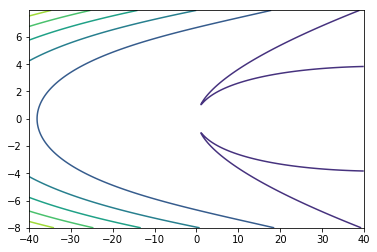

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(-40, 40, 0.05)
y=np.arange(-8, 8, 0.05)
X,Y=np.meshgrid(x,y)

Z = (1-X**3) + 100*(Y**2-X)**2
fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
#plt.ylim((-9,9))

<br>

## Problem 2.3

Write a Gradient Descent algorithm for ﬁnding the minimum of the function. Visualize your results with a few diﬀerent learning rates.

In [72]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-200*(y**2-x) 
    df_dy = 400*y**3-400*x*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point, iterations, learning_rate):
    point = starting_point
    trajectory = [point]
        
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    print('Final point: ',point)
    return np.array(trajectory)

Final point:  [7.16017539e-08 2.83078999e-04]


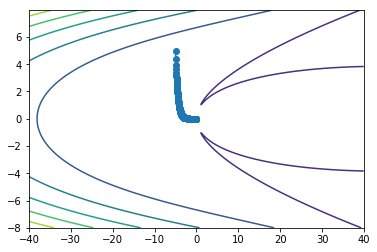

In [112]:
##############################
### learning rate: 0.00001
##############################
stpoint = np.array([-5,5])
trj = grad_descent(stpoint,iterations=10000,learning_rate = 0.00001)
fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

Final point:  [3.06863673e-08 1.75175247e-04]


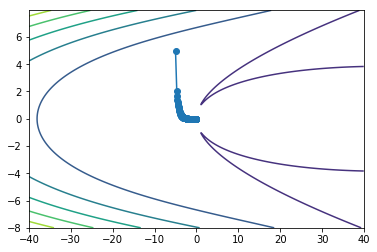

In [106]:
##############################
### learning rate: 0.00005
##############################
stpoint = np.array([-5,5])
trj = grad_descent(stpoint,iterations=10000,learning_rate = 0.00005)
fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

Final point:  [ 1.74152490e-08 -1.31966848e-04]


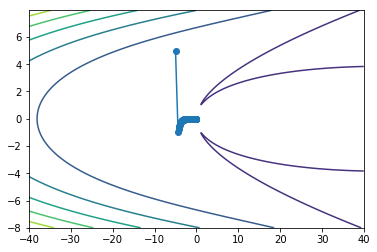

In [107]:
##############################
### learning rate: 0.0001
##############################
stpoint = np.array([-5,5])
trj = grad_descent(stpoint,iterations=10000,learning_rate = 0.0001)
fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

We tried three learning rates as shown above. Within certain range, larger learning rate yeilds faster convergence.

<br>

## Problem 2.4
Write a Gradient Descent With Momentum algorithm for ﬁnding the minimum. Visualize your results with a few diﬀerent settings of the algorithm’s hyperparameters.

In [119]:
def grad_descent_with_momentum(starting_point, iterations, alpha, epsilon):
    point = starting_point   
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    print('Final point: ',point)
    return np.array(trajectory)


Final point:  [7.17343088e-08 2.83013314e-04]


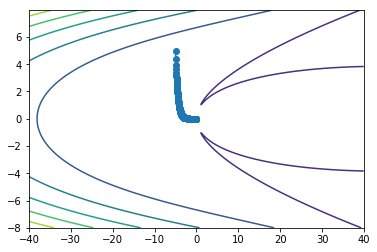

In [120]:
##################################
### epsilon: 0.00001, alpha=0.001
##################################

stpoint = np.array([-5,5])
trj = grad_descent_with_momentum(stpoint,iterations=10000, epsilon=0.00001, alpha=0.001)

fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

Final point:  [3.05691859e-08 1.74840458e-04]


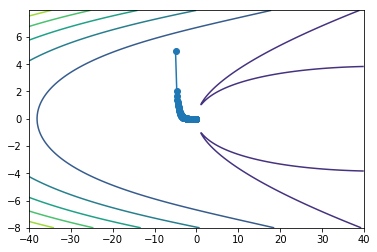

In [121]:
##################################
### epsilon: 0.00005, alpha=0.001
##################################

stpoint = np.array([-5,5])
trj = grad_descent_with_momentum(stpoint,iterations=10000, epsilon=0.00005, alpha=0.001)

fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= trj[:,0]
y= trj[:,1]
plt.plot(x,y,'-o')

Final point:  [ 1.76688946e-08 -1.32924394e-04]


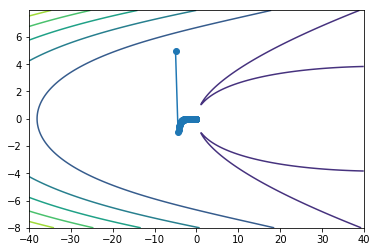

In [122]:
##################################
### epsilon: 0.0001, alpha=0.001
##################################

stpoint = np.array([-5,5])
traj = grad_descent_with_momentum(stpoint,iterations=10000, epsilon=0.0001, alpha=0.001)

fig, ax = plt.subplots()
ct = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

We tried three different sets of hyperparameters. The value of epsilon has more apparent effect than alpha. Larger epsilon yeilds faster convergence. 